# TP 5 Applications d'algorithme de Metropolis-Hastings
## Optimisation stochastique
Réference : Bernard ycart, grenoble, chaînes de Markov



## Recuit simulé 

### Exercice 1: Voyageur de commerce

In [5]:
from numpy.random import rand,randint,permutation
import numpy as np
import matplotlib.pyplot as plt

In [7]:
nbr_villes = 20
# on tire 20 villes au hasard dans [0,1]x[0,1]
np.random.seed(13) # reproductibilité
villes = rand(20,2) # tableau de 20 lignes et 2 colonnes

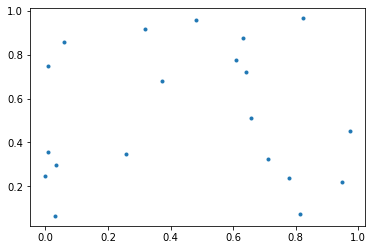

In [9]:
plt.plot(villes[:,0],villes[:,1],'.')
plt.show()

un parcous : un cycle ( c.a.d point d'arrivé = point de départ ). On peut le représenter par une permutation des entiers entre 0 et 19.

In [12]:
L = permutation(range(20)) # un parcours possible
L

array([ 5, 18, 16, 17, 19,  1,  7,  8, 10, 14,  2, 12, 15,  4,  0,  9,  3,
       11, 13,  6])

In [19]:
def trace_parcours(L):
    #Trace le parcours donnée dans le tableau ou la liste L
    plt.plot(villes[L,0],villes[L,1])
    plt.plot(villes[:,0],villes[:,1],'.',c='r',markersize=9)
    plt.show()

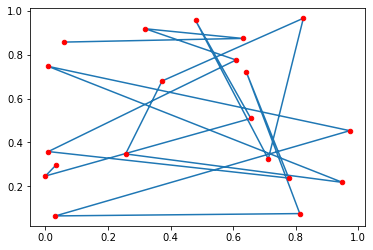

In [20]:
trace_parcours(L)

In [22]:
# le nombre de configurations possibles
np.math.factorial(20)

2432902008176640000

In [67]:
# Calcul de tableau des distances
def dist(i,j):
    #Dist euclidienne entre les villes i et j
    dx = (villes[i,0] - villes[j,0])**2
    dy = (villes[i,1] - villes[j,1])**2
    return np.sqrt(dx+dy)

# Construction du tableau
distances = np.zeros((nbr_villes,nbr_villes))
for i in range(nbr_villes):
    for j in range(nbr_villes):
        distances[i,j] = dist(i,j)

In [68]:
# la fonction a miniser ("energie","coût")
# la distance totale d'un parcours
def energie(L):
    s = 0
    for i in range(nbr_villes):
        s += distances[L[i],L[(i+1) % nbr_villes]]
        # lorsque i = nbr_villes-1 alors (i+1) % nbr_villes vaut 0 
        # ce qui donne la distance de retour jusqu'au point de départ
    return s

In [69]:
# test
L = np.arange(nbr_villes)
print(energie(L))

12.170815288753875


In [70]:
# le parcours est cyclique, la meme distance est parcourus peut importe la ville de départ
L1 = np.array(list(L[7:]) + list(L[:7]))
print(L1)
print(energie(L1))

[ 7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6]
12.170815288753879


In [71]:
# Une marche aléatoire sur l'espace de toutes les permutations
def permut(L):
    # Permute 5 éléments consécutifs dans L (retourne un nouveau tableau)
    v = randint(nbr_villes) # indice d'un segment de 5 villes que l'on veut permuter 
    # déplacement d'un segment aléatoire au début de la liste
    if v > 0:
        L1 = np.array(list(L[v:]) + list(L[:v]) )
    else:
        L1 = np.copy(L)
    L1[0:5] = L1[permutation(5)] # permutation des 5 premiers éléements
    return L1

In [72]:
L  = permut(L)
print(L)

[16 18 19 15 17  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [83]:
def recuit_simule(L,h,un_sur_T):
    # effecute l'algorithme de recuit simulé
    # à partir de la température T (un_sur_T = inverse de la température)
    # h : paramètre a choisir qui définit combien de temps
    # on reste à une température constante
    o = np.copy(L)     # ordre de parcours actuel (constant)
    elist = []         # pour stocker les valeurs de l'énérgie aucours de l'éxécution
    o_min = np.copy(o) # le meilleur parcours observé
    e1 = energie(o)    # energie (distance totale) du parcours observée
    e_min = energie(o_min) # l'energie minimale observée
    n = 0
    for ut in range(1, un_sur_T):
        # ut : inverse de la température acutelle
        palier = int(np.exp(ut * h))
        while n < palier: # for n in range(palier) ca revient au même
            o2 = permut(o) #etat "voisin" candidat, parcours modifié
            e2 = energie(o2)
            if e2 < e1:
                # acceptation tout de suite le nouveau parcours (état)
                o = np.copy(o2)
                e1 = e2
            else:
                # le cas ou le nouveau candidat est moins bien c.a.d plus long
                #calcul de proba d'acceptation
                constante = 1 # à ajuster selon les valeurs de l'énergie
                p = np.exp((e1-e2) * ut* constante)
                if rand() < p:
                    # on accepte le nouvel etat avec proba p qui diminue dans le temps
                    o = np.copy(o2)
                    e1 = e2
            #la vérification de minimum
            if e1 < e_min:
                #si c'est le meilleur état jamais observé, je le note
                #comme nouveau minimum à retenir
                e_min = e1
                o_min = np.copy(o)
            #dans tous les cas je note l'énergie actuelle pour une visu
            elist.append(e1)
            n += 1
    return o,e_min,o_min,elist
    
    

distance du dernier parcous observé 4.860778604926578


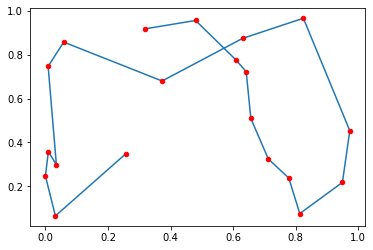

distance minimale observé 4.750628589026125


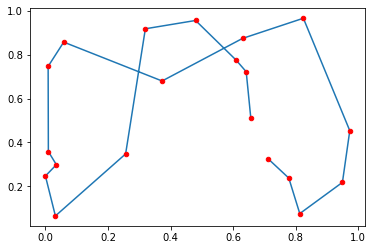

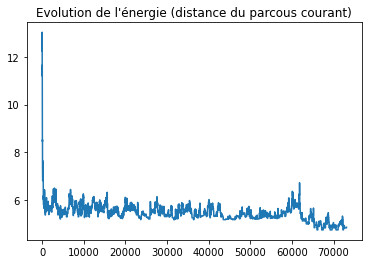

In [100]:
L_init = np.arange(nbr_villes) #parcours initial quelconque
o, emin, omin, elist = recuit_simule(L_init, 0.7, 17) 
print("distance du dernier parcous observé", energie(o))
trace_parcours(o)

print("distance minimale observé", emin)
trace_parcours(omin)

plt.plot(elist)
plt.title("Evolution de l'énergie (distance du parcous courant)")
plt.show()

## Exercice
Refaire la meme chose sur le carré [0,2] x [0,2]

